In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import os
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

In [4]:
ls /home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/*.nc

/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185001-185012.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185101-185112.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185201-185212.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185301-185312.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185401-185412.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185501-185512.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185601-185612.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/rsntds_Omon_EC-Earth3_historical_r11i1p1f1_gn_185701-185712.nc.nc
/home/z5113258/Documents/data/CMIP6/EC-Earth3/RS

In [5]:
#load in Q data (Model only)
SW = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/EC-Earth3/RSNTDS/*.nc').rsntds
Q = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/EC-Earth3/EC-Earth3_HFDS.nc').hfds

In [10]:
SW

<xarray.DataArray 'rsntds' (time: 1980, lat: 180, lon: 360)>
dask.array<concatenate, shape=(1980, 180, 360), dtype=float32, chunksize=(12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  net_downward_shortwave_flux_at_sea_water_surface
    long_name:      Net Downward Shortwave Radiation at Sea Water Surface
    units:          W m-2
    comment:        This is the flux into the surface of liquid sea water onl...
    original_name:  rsntds
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-07-15T18:47:44Z altered by CMOR: Reordered dimension...

In [8]:
qpen = (SW*((0.67*np.exp(-50))+((1-0.67)*np.exp(-50/17))))

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

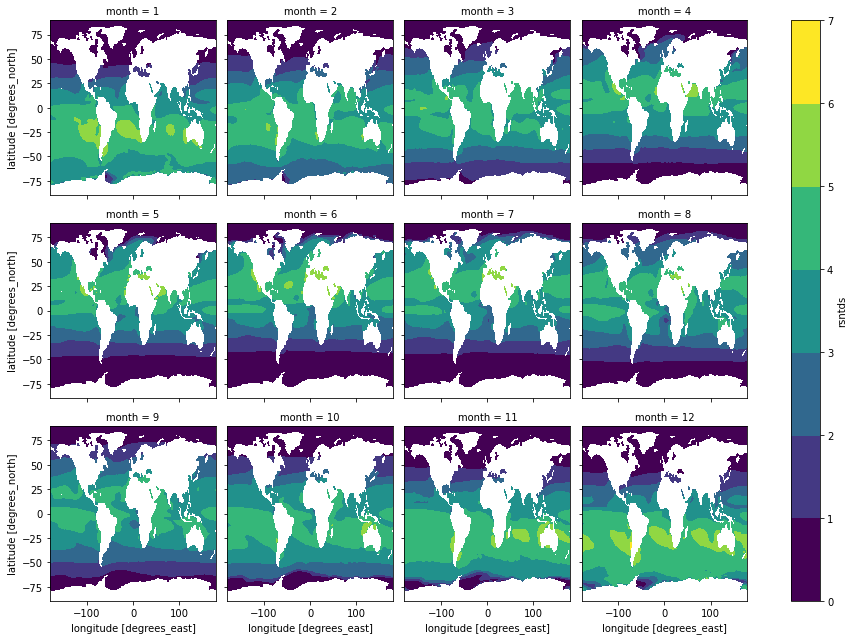

In [12]:
qpen.groupby("time.month").mean("time").plot.contourf(col = 'month', col_wrap= 4, levels = 8)

In [71]:
Qn = (Q-SW*((0.67*np.exp(-50))+((1-0.67)*np.exp(-50/17))))/(3986*1026*50)

In [69]:
np.exp(2)

7.38905609893065

In [3]:
#load in godas sw or what i think it is to see if it very different
GSW = xr.open_dataset('/g/data/e14/sm2435/GODAS/dswrf_remap.nc').dswrf
GQ = xr.open_mfdataset('/g/data/e14/sm2435/GODAS/remapcon_1/thflx/*.nc').thflx

/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/apps/xarray/0.15.1-py3.7/lib/python3.7/site-packages/xarray-0.15.1-py3.7.egg/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [4]:
GQ

,Array,Chunk
Bytes,127.53 MB,3.11 MB
Shape,"(492, 180, 360)","(12, 180, 360)"
Count,123 Tasks,41 Chunks
Type,float32,numpy.ndarray


In [40]:
def date_to_middle(vari, varname):
    data_list = []
    
    try:
        for i in range(len(vari.time)):
            val = ((vari[i,:,:]+vari[i+1,:,:])/2).values
            data_list.append(val)
    except:
        print('error')
    arr = np.asarray(data_list)
    test = xr.DataArray(arr, coords={'time': vari.time[1:], 'lat': vari.lat, 'lon':vari.lon},
                 dims=['time', 'lat', 'lon'], attrs=dict(
            description=varname))
    return test

In [57]:
GQ1 = date_to_middle(GQ, 'Q')
GSW1= date_to_middle(GSW, 'SW')

error
error


In [39]:
GQ1c=GQ1.groupby('time.month').mean('time')


/apps/xarray/0.15.1-py3.7/lib/python3.7/site-packages/xarray-0.15.1-py3.7.egg/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [42]:
GQ2c=GQ2.groupby('time.month').mean('time')
GQc= GQ.groupby('time.month').mean('time')

/apps/xarray/0.15.1-py3.7/lib/python3.7/site-packages/xarray-0.15.1-py3.7.egg/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [8]:
SW=SW.groupby('time.month').mean('time')
Q=Q.groupby('time.month').mean('time')

/apps/xarray/0.15.1-py3.7/lib/python3.7/site-packages/xarray-0.15.1-py3.7.egg/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


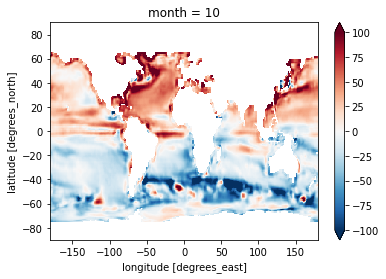

In [34]:
(Q-GQ2c)[9].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')#-1

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


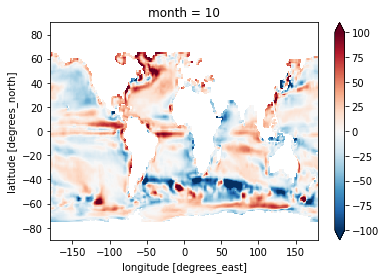

In [35]:
(Q-GQc)[9].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')#+1

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


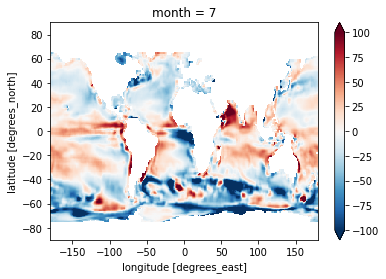

In [27]:
(Q-GQc)[6].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')

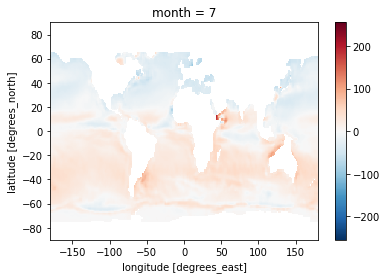

In [33]:
(GQ2c-GQ1c)[6].plot()

In [36]:
def plot_background_sml(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 120., -25., 15.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

def plot_sml(dict_name, maxv, minv, varname):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12), sharey='all', sharex='all', 
                             subplot_kw={'projection':ccrs.PlateCarree()})
    var = dict_name
    lons = var.sel(lat=slice(-55,40),lon=slice(30,150)).lon
    lats = var.sel(lat=slice(-55,40),lon=slice(30,150)).lat
    #dTdt
    #axes[0,num].set_title(key)
    axi=1
    for col in range(0,2):
        for row in range(0,6):

            axes[row, col].pcolormesh(lons, lats, var.sel(lat=slice(-55,40),lon=slice(30,150)).sel(month = (axi)), 
                                #levels = 41, 
                                cmap = 'RdBu_r', 
                                #add_colorbar=True, 
                                vmin = minv, vmax = maxv, 
                                transform=ccrs.PlateCarree())
            #title is month
            axes[row, col].set_title(var.sel(month = (axi)).month.values)
            plot_background_sml(axes[row, col], row, col)
            axi=axi+1

            
    cbar_ax2 = fig.add_axes([1, 0.5, 0.03, 0.3])
    cmap2 = plt.cm.RdBu_r
    bounds = np.linspace(minv, maxv, 21)
    norm2 = mpl.colors.BoundaryNorm(bounds, cmap2.N)
    cb = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2, norm=norm2,
        spacing='proportional', ticks=bounds, boundaries=bounds)
    fig.suptitle(varname)
    #fig.tight_layout()
    return fig

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

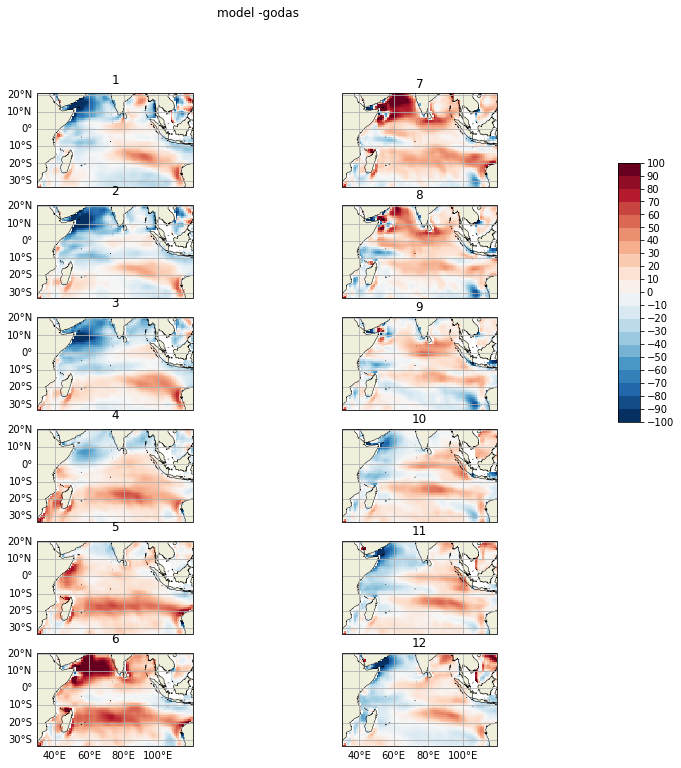

In [51]:
X=plot_sml((Q-GQc), 100, -100, 'model -godas')
X.savefig('/g/data/e14/sm2435/figures/model-godas.png', dpi = 300, bbox_inches='tight')

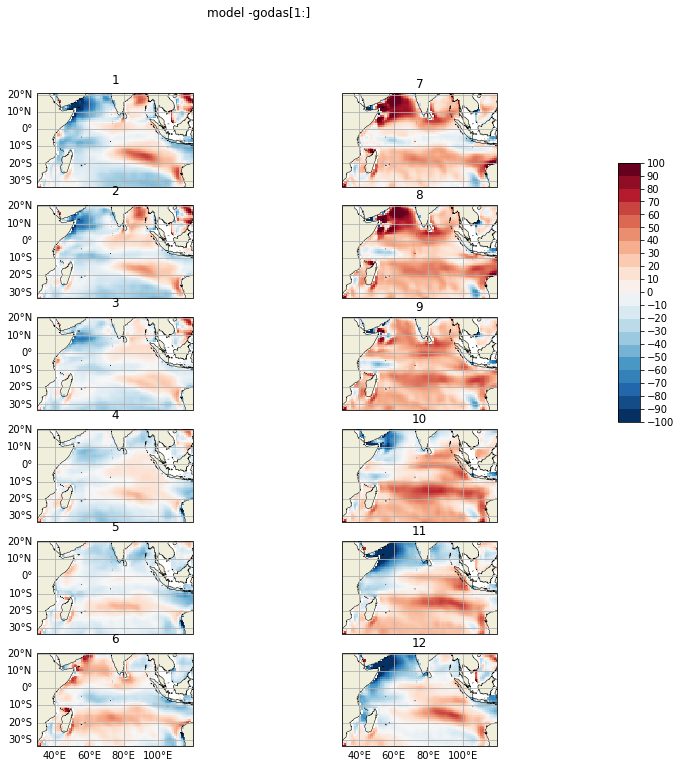

In [52]:
X=plot_sml((Q-GQ1c), 100, -100, "model -godas[1:]")
X.savefig('/g/data/e14/sm2435/figures/model-godas1.png', dpi = 300, bbox_inches='tight')

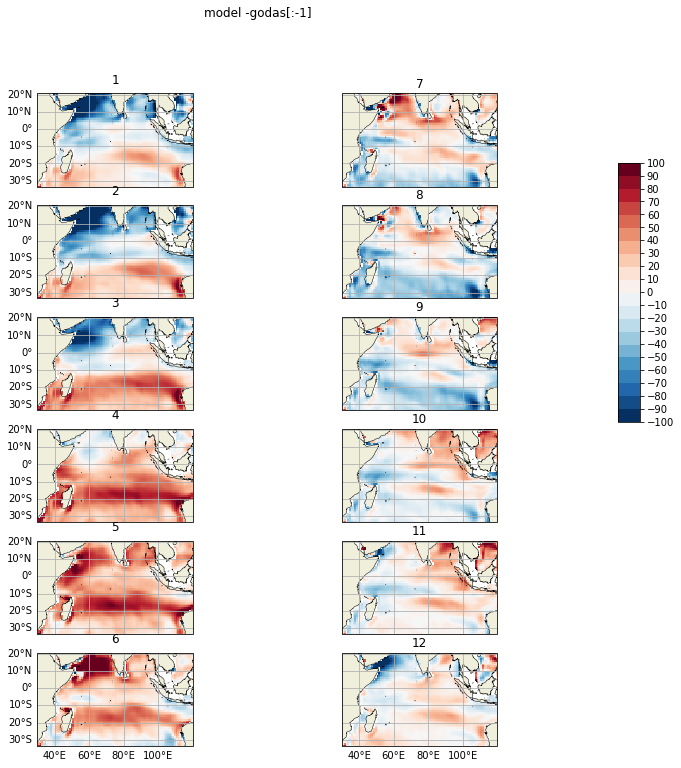

In [53]:
X=plot_sml((Q-GQ2c), 100, -100, "model -godas[:-1]")
X.savefig('/g/data/e14/sm2435/figures/model-godas-1.png', dpi = 300, bbox_inches='tight')

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


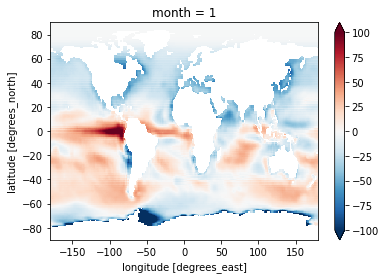

In [60]:
(SW-(GSW2.groupby('time.month').mean('time')))[0].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


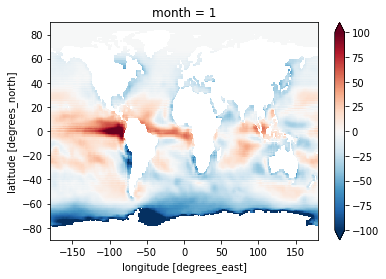

In [61]:
(SW-(GSW.groupby('time.month').mean('time')))[0].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


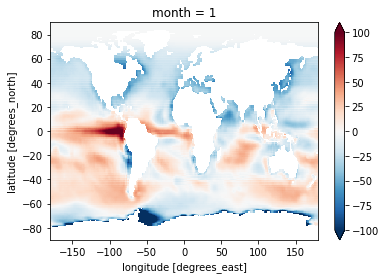

In [62]:
(SW-(GSW1.groupby('time.month').mean('time')))[0].plot(vmin = -100, vmax = 100, cmap = 'RdBu_r')

/apps/dask/2.19.0-py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


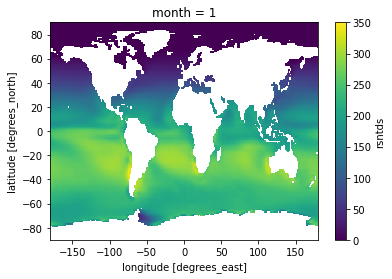

In [65]:
SW[0].plot(vmin = 0, vmax = 350)

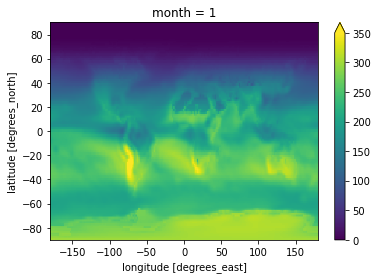

In [67]:
(GSW2.groupby('time.month').mean('time'))[0].plot(vmin = 0, vmax = 350)